In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [62]:
df = pd.read_csv('train.csv')

In [17]:
df

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...,...
749995,749995,male,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,749996,female,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,749998,male,45,182.0,91.0,17.0,102.0,40.3,109.0


In [18]:
print(df.isnull().sum())

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [19]:
print(df.duplicated().sum())

0


In [20]:
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [34]:
print("Numerical Features Summary:")
display(df.describe())

Numerical Features Summary:


,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [35]:
print("First 10 Rows of the Dataset:")
display(df.head(10))

First 10 Rows of the Dataset:


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
5,5,female,26,156.0,56.0,19.0,100.0,40.5,103.0
6,6,female,21,172.0,73.0,3.0,81.0,38.3,9.0
7,7,male,46,188.0,94.0,23.0,100.0,40.8,145.0
8,8,female,33,166.0,63.0,25.0,107.0,40.5,161.0
9,9,male,65,185.0,88.0,23.0,104.0,41.0,185.0


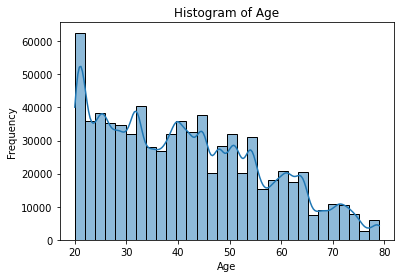

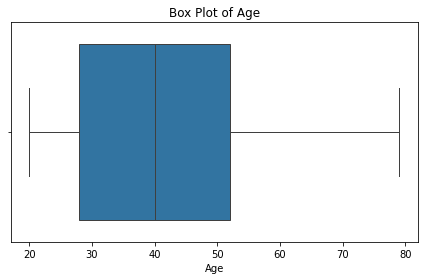


Statistics for Age:
Skewness: 0.44
Number of Missing Values: 0


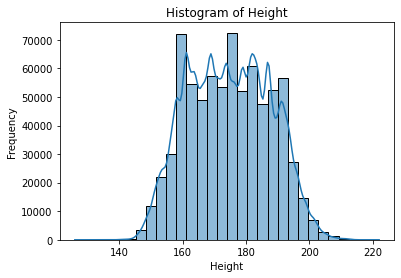

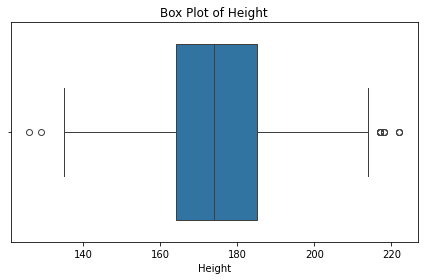


Statistics for Height:
Skewness: 0.05
Number of Missing Values: 0


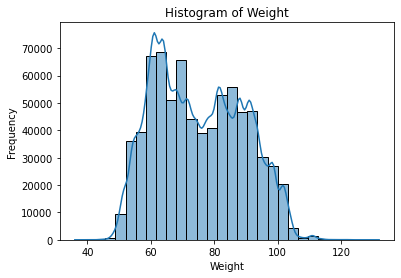

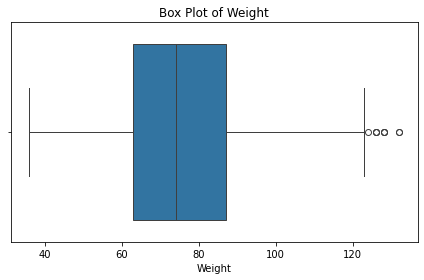


Statistics for Weight:
Skewness: 0.21
Number of Missing Values: 0


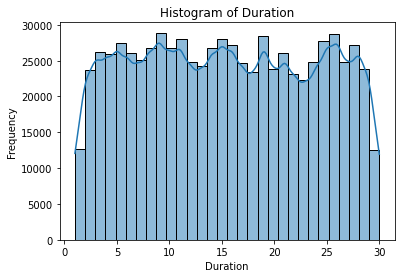

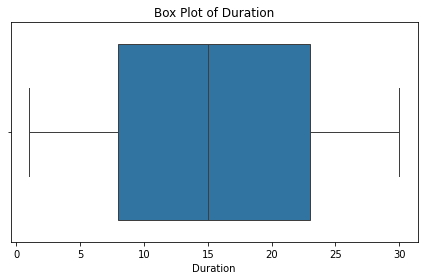


Statistics for Duration:
Skewness: 0.03
Number of Missing Values: 0


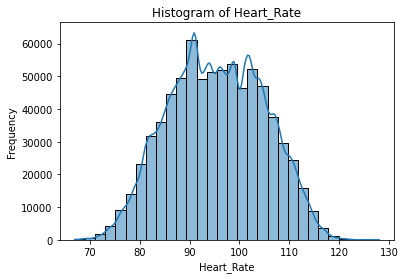

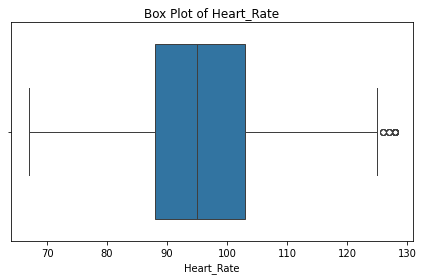


Statistics for Heart_Rate:
Skewness: -0.01
Number of Missing Values: 0


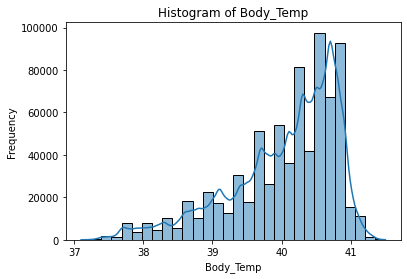

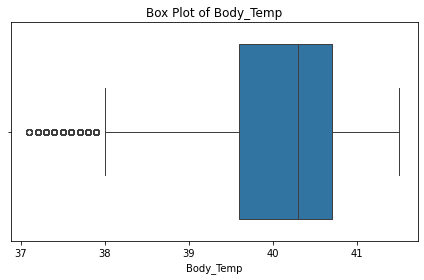


Statistics for Body_Temp:
Skewness: -1.02
Number of Missing Values: 0


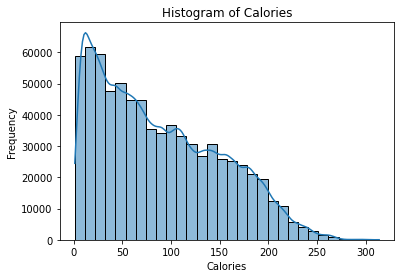

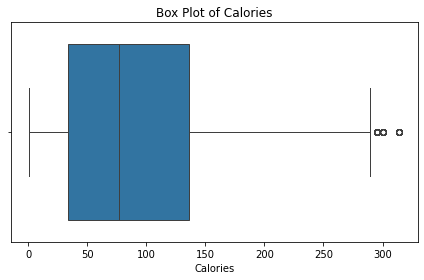


Statistics for Calories:
Skewness: 0.54
Number of Missing Values: 0


In [69]:
numerical_features = [
    "Age",
    "Height",
    "Weight",
    "Duration",
    "Heart_Rate",
    "Body_Temp",
    "Calories"   
]

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.savefig(f'D:/visualisation/{feature}_Histogram.png')
    plt.show()
    
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f"Box Plot of {feature}")
    plt.savefig(f'D:/visualisation/{feature}_BoxPlot.png')
    plt.tight_layout()
    plt.show()

    print(f"\nStatistics for {feature}:")
    print(f"Skewness: {df[feature].skew():.2f}")
    print(f"Number of Missing Values: {df[feature].isnull().sum()}")

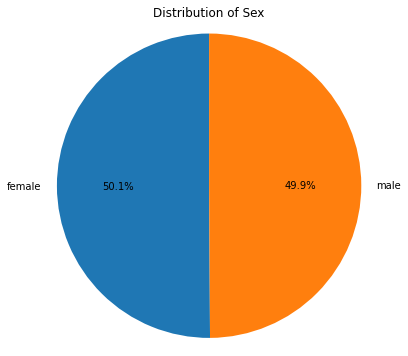

Number of Unique Sex: 2
Missing Values in Sex: 0


In [66]:
sex_counts = df["Sex"].value_counts()
feature = "Sex"

plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Sex")
plt.axis("equal")
plt.savefig(f'D:/visualisation/{feature}_distribution.png')
plt.show()

print(f"Number of Unique {feature}: {df[feature].nunique()}")
print(f"Missing Values in {feature}: {df[feature].isnull().sum()}")

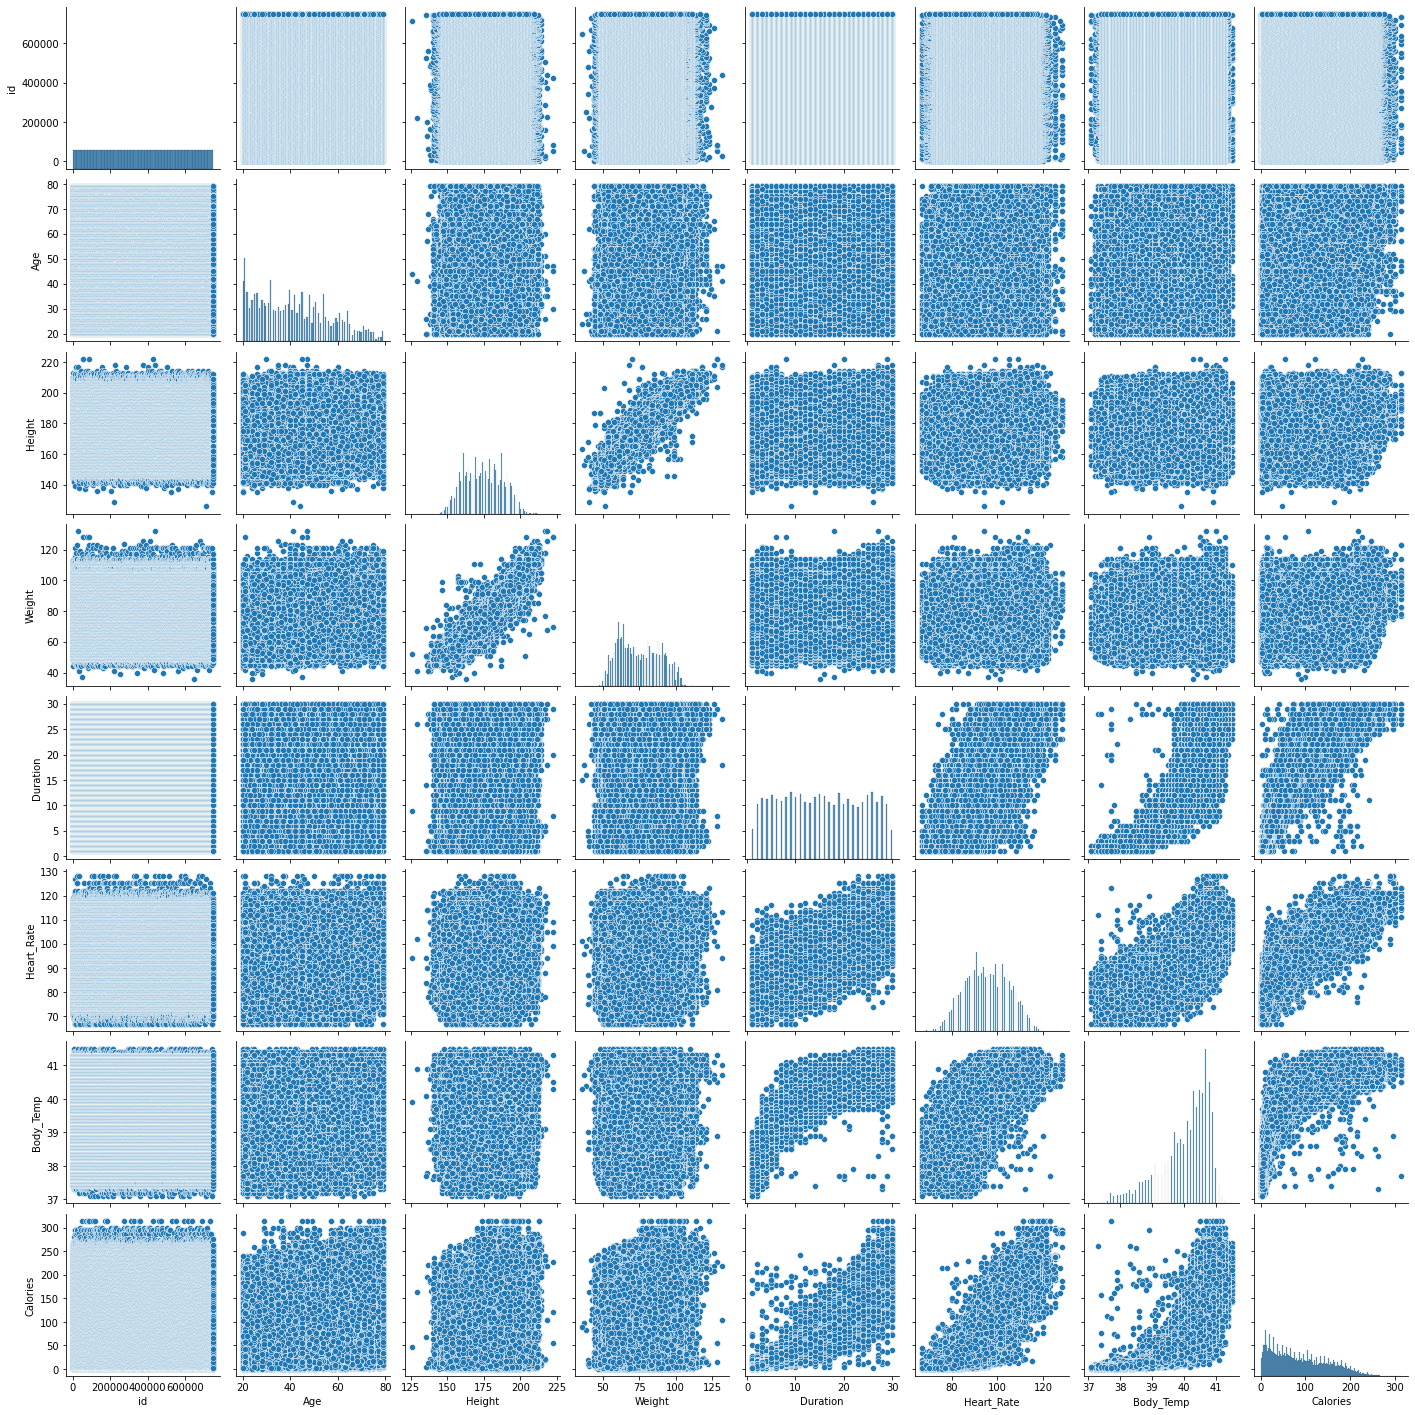

In [70]:
sns.pairplot(df)
plt.savefig(f'D:/visualisation/pairplot.png')

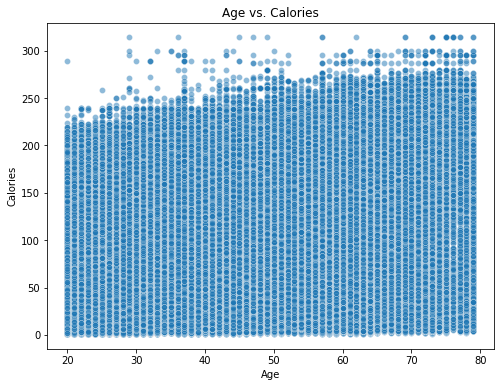

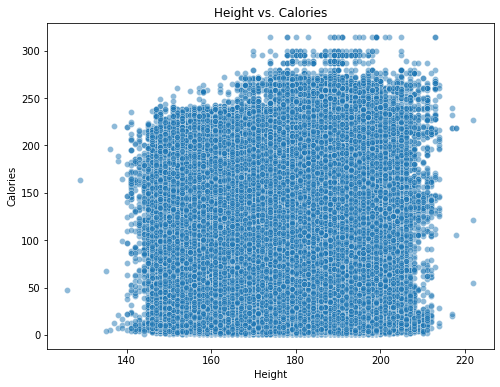

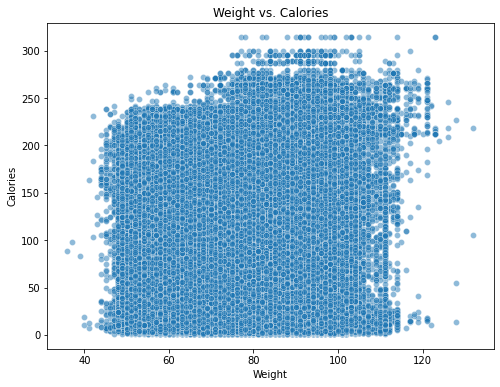

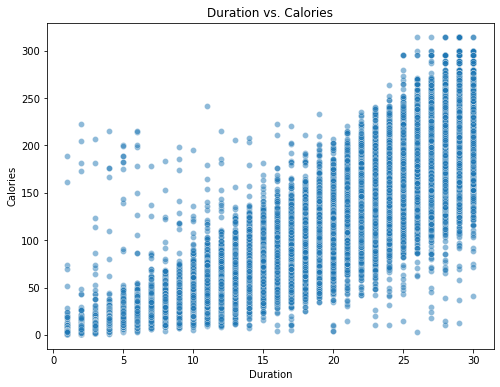

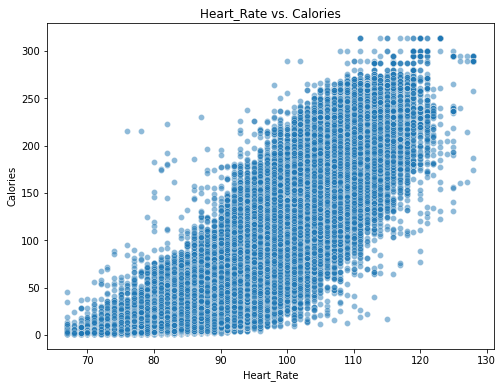

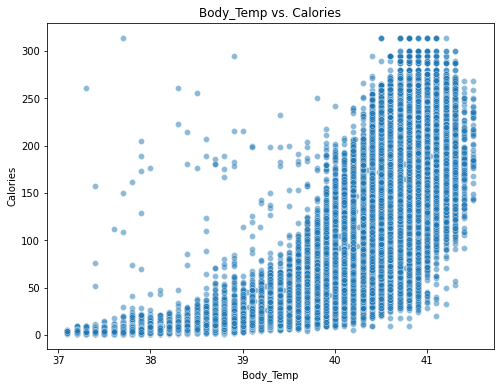

In [71]:
for feature in numerical_features[:-1]:  
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=df[feature], y=df["Calories"], alpha=0.5
    )
    plt.title(f"{feature} vs. Calories")
    plt.xlabel(feature)
    plt.ylabel("Calories")
    plt.savefig(f'D:/visualisation/{feature}_scatterplot.png')
    plt.show()


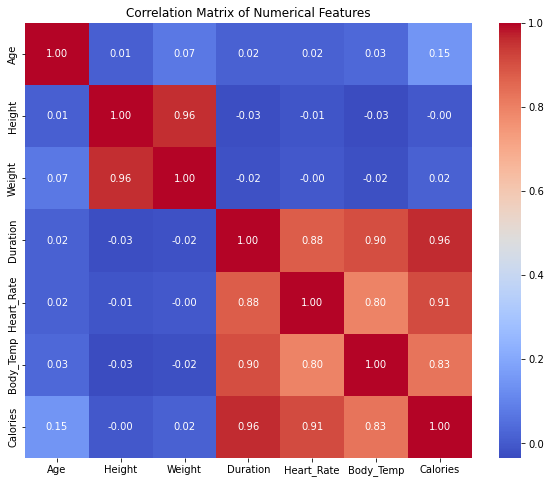

In [72]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.savefig(f'D:/visualisation/heatmap.png')
plt.show()

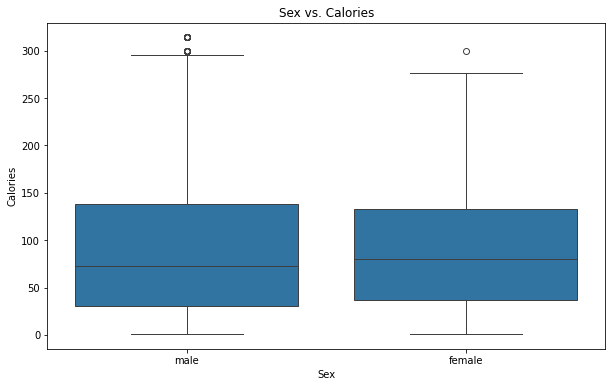

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Sex"], y=df["Calories"])
plt.title("Sex vs. Calories")
plt.xlabel("Sex")
plt.ylabel("Calories")
plt.savefig(f'D:/visualisation/Sex_vs_Calories.png')
plt.show()

In [74]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['BMI'] = df['Weight'] / (df['Height']/100) ** 2
df['Height_Weight_Ratio'] = df['Height'] / df['Weight']
df['HR_Duration'] = df['Heart_Rate'] * df['Duration']
df['Temp_Duration'] = df['Body_Temp'] * df['Duration']
df['Weight_Duration'] = df['Weight'] * df['Duration']

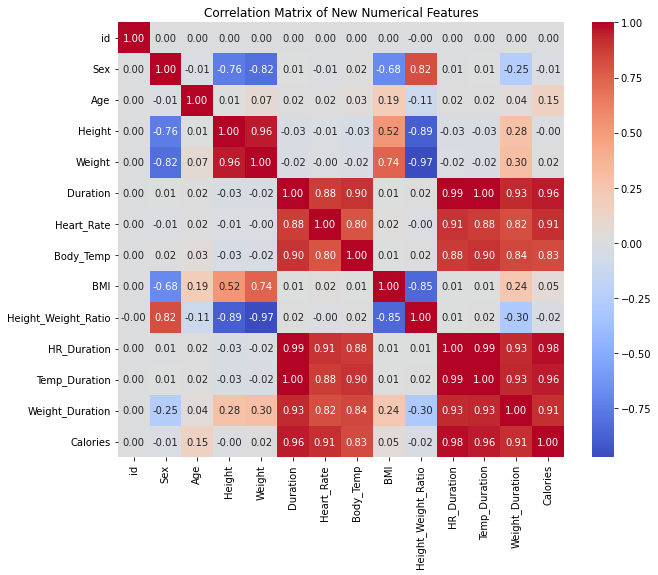

Calories               1.000000
HR_Duration            0.977341
Temp_Duration          0.960909
Duration               0.959908
Weight_Duration        0.912617
Heart_Rate             0.908748
Body_Temp              0.828671
Age                    0.145683
BMI                    0.049226
Weight                 0.015863
id                     0.001148
Height                -0.004026
Sex                   -0.012011
Height_Weight_Ratio   -0.019145
Name: Calories, dtype: float64

In [75]:
df = df[[col for col in df if col != 'Calories'] + ['Calories']]

correlation_matrix_new = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_new, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of New Numerical Features")
plt.savefig(f'D:/visualisation/heatmap_new.png')
plt.show()

calories_correlation = correlation_matrix_new['Calories'].sort_values(ascending=False)
calories_correlation

In [53]:
df.to_csv('D:/train_new.csv')

In [57]:
numerical_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'BMI', 'Height_Weight_Ratio', 'HR_Duration', 'Temp_Duration', 'Weight_Duration']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [58]:
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,BMI,Height_Weight_Ratio,HR_Duration,Temp_Duration,Weight_Duration,Calories
0,0,0,-0.357192,1.115235,0.490201,1.266324,0.583714,1.235772,-0.939009,-0.251414,1.162994,1.288292,1.449912,150.0
1,1,1,1.487943,-0.912137,-1.083172,-0.888309,-1.109436,-0.431163,-1.185799,1.204209,-0.923974,-0.889529,-1.005217,34.0
2,2,1,0.631273,-1.068088,-0.797104,-1.008011,-1.215258,-0.302938,0.208818,0.493551,-1.022639,-1.003018,-1.052774,29.0
3,3,0,-1.411555,1.349162,1.062337,1.146622,1.007002,0.851095,0.025968,-0.857804,1.161922,1.147159,1.625278,140.0
4,4,1,-0.225397,-0.678209,-1.011655,1.146622,0.689536,0.722869,-1.480887,1.220628,1.081489,1.139884,0.547816,146.0


In [59]:
df.to_csv('D:/train_new_Standard.csv')

In [60]:
test_df = pd.read_csv('test.csv')

test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df['BMI'] = test_df['Weight'] / (test_df['Height']/100) ** 2
test_df['Height_Weight_Ratio'] = test_df['Height'] / test_df['Weight']
test_df['HR_Duration'] = test_df['Heart_Rate'] * test_df['Duration']
test_df['Temp_Duration'] = test_df['Body_Temp'] * test_df['Duration']
test_df['Weight_Duration'] = test_df['Weight'] * test_df['Duration']

test_df.to_csv('D:/test_new.csv')
test_df[numerical_features] = scaler.fit_transform(test_df[numerical_features])
test_df.to_csv('D:/test_new_Standard.csv')

In [61]:
test_df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,BMI,Height_Weight_Ratio,HR_Duration,Temp_Duration,Weight_Duration
0,750000,0,0.233733,0.177381,0.418634,-1.007942,-0.897244,-0.303287,0.983561,-0.675506,-0.999762,-1.002912,-0.875734
1,750001,0,-1.018101,1.971171,1.563168,0.549109,0.584215,0.595940,-0.077877,-1.111381,0.513973,0.544376,1.165511
2,750002,1,-0.820443,1.035280,0.704768,0.070016,0.690034,0.467479,-0.210607,-0.581567,0.097722,0.068018,0.303222
3,750003,1,-0.161583,-0.212574,-0.153633,0.549109,1.219126,0.724402,0.203583,-0.071224,0.642710,0.550199,0.451893
4,750004,1,-0.754557,-0.134583,-0.582834,0.070016,-0.156514,0.595940,-1.310668,0.727249,-0.039597,0.072677,-0.124948
